<a href="https://colab.research.google.com/github/KostantinDubnitskyi/Methodd/blob/main/%D0%9B%D1%80_7_(%D0%94%D1%83%D0%B1%D0%BD%D0%B8%D1%86%D1%8C%D0%BA%D0%B8%D0%B9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота №7
Перша інтерполяційна формула Ньютона

In [ ]:
import numpy as np
from math import factorial

x = np.array([1.415, 1.420, 1.425, 1.430, 1.435, 1.440, 1.445, 1.450, 1.455, 1.460, 1.465])
y = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])

def newton_forward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]

    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[0]) / h

    ans = delta_y[0, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q - i + 1)
        ans += (q_prod * delta_y[0, i]) / factorial(i)

    return ans

x1 = 1.416
y1 = newton_forward_interpolation(x, y, x1)

print(f"f({x1}) = {y1}")

f(1.416) = 0.8882224592474107


In [ ]:
import numpy as np
from math import factorial

x = np.array([1.415, 1.420, 1.425, 1.430, 1.435, 1.440, 1.445, 1.450, 1.455, 1.460, 1.465])
y = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])

def newton_backward_interpolation(x, y, x0):
    n = len(x)
    h = x[1] - x[0]

    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            delta_y[i, j] = delta_y[i+1, j-1] - delta_y[i, j-1]

    q = (x0 - x[-1]) / h

    ans = delta_y[-1, 0]
    q_prod = 1

    for i in range(1, n):
        q_prod *= (q + i - 1)
        ans += (q_prod * delta_y[n-i-1, i]) / factorial(i)

    return ans

x2 = 1.456
y2 = newton_backward_interpolation(x, y, x2)

print(f"f({x2}) = {y2}")

f(1.456) = 0.8968518438182911


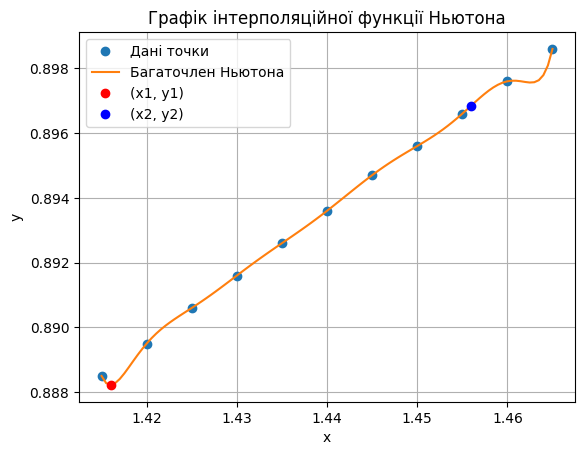

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    # Використовуйте відповідну функцію інтерполяції
    if xx[i] <= x[len(x) // 2]:  # Використовуємо інтерполяцію вперед для першої половини
        yy[i] = newton_forward_interpolation(x, y, xx[i])
    else:  # Використовуємо інтерполяцію назад для другої половини
        yy[i] = newton_backward_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label="Багаточлен Ньютона")
plt.plot(x1, y1, 'ro', label='(x1, y1)')
plt.plot(x2, y2, 'bo', label='(x2, y2)')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()